In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split # holdout
from sklearn.inspection import permutation_importance
from sklearn.metrics import matthews_corrcoef, make_scorer
import pycaret
from pycaret.classification import *

In [2]:
DATA = Path("../../data")

In [3]:
train_data = pd.read_csv(DATA / "train_missing_value_80per_under.csv")
test_data = pd.read_csv(DATA / "test_missing_value_80per_under.csv")

In [4]:
train_data

,class,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
0,e,4.51,15.39,a,8.80,f,u,f,w,f,d,w,f,a,s,c,NaN
1,p,4.79,6.48,w,4.51,f,o,t,o,x,d,n,z,a,h,c,y
2,e,6.85,9.93,w,6.94,f,b,f,n,f,l,w,f,x,s,c,s
3,e,4.16,6.53,u,3.88,f,g,f,w,f,d,g,f,s,y,NaN,NaN
4,e,3.37,8.36,a,5.85,f,w,f,w,x,g,w,f,d,l,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,12.14,18.81,u,9.29,t,n,t,w,f,d,w,g,NaN,NaN,NaN,NaN
3116941,e,6.65,26.97,u,10.88,t,w,f,w,s,d,p,f,d,NaN,c,NaN
3116942,p,9.51,11.06,a,7.82,f,e,t,y,x,d,w,z,a,e,NaN,NaN
3116943,e,9.13,17.77,u,9.45,t,n,t,w,p,d,p,p,e,i,NaN,y


In [5]:
test_data

,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
0,11.13,17.12,a,8.64,t,n,t,w,x,d,w,g,NaN,NaN,NaN,NaN
1,1.27,10.75,a,6.90,f,o,f,n,o,d,y,f,NaN,t,c,NaN
2,6.18,3.14,s,2.00,f,n,f,n,b,d,n,f,NaN,g,c,NaN
3,4.98,8.51,u,3.47,f,n,t,w,x,d,n,z,s,t,c,NaN
4,6.73,13.70,u,6.17,f,y,t,y,x,d,y,NaN,p,h,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,2.67,1.35,u,0.88,f,w,f,e,x,d,w,f,a,g,d,NaN
2077960,2.69,7.38,a,3.12,f,w,f,w,x,g,w,f,d,s,c,NaN
2077961,6.16,9.74,a,5.73,f,e,t,y,x,d,w,z,a,e,NaN,NaN
2077962,6.00,3.46,a,5.03,f,n,f,g,b,d,g,f,a,g,d,s


In [6]:
print(f"Train Shape : {train_data.shape}")
print(f"Test Shape : {test_data.shape}")

Train Shape : (3116945, 17)
Test Shape : (2077964, 16)


In [7]:
feature = train_data.iloc[:, 1:]
target = train_data.iloc[:, 0]

In [8]:
train_X, valid_X, train_y, valid_y = train_test_split(feature, target, test_size=0.1, shuffle=True, stratify=target, random_state=42) # Holdout

In [9]:
print(f"Train_X Shape : {train_X.shape}")
print(f"Valid_X Shape : {valid_X.shape}")
print(f"Train_y Shape : {train_y.shape}")
print(f"Valid_y Shape : {valid_y.shape}")

Train_X Shape : (2805250, 16)
Valid_X Shape : (311695, 16)
Train_y Shape : (2805250,)
Valid_y Shape : (311695,)


In [10]:
categorical_features = list(feature.select_dtypes(include=["object"]).columns)
numeric_features = list(feature.select_dtypes(include=["float"]).columns)

In [11]:
exp_clf = setup(data=train_data, 
                target='class', 
                categorical_features=categorical_features,
                numeric_features=numeric_features,
                session_id=42)

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Target mapping,"e: 0, p: 1"
4,Original data shape,"(3116945, 17)"
5,Transformed data shape,"(3116945, 62)"
6,Transformed train set shape,"(2181861, 62)"
7,Transformed test set shape,"(935084, 62)"
8,Numeric features,3
9,Categorical features,13


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
cb_model = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,0.9967,0.9902,0.9902,0.9902,0.9802,0.9802
1,0.9901,0.9967,0.9901,0.9901,0.9901,0.9801,0.9801
2,0.9901,0.9964,0.9901,0.9901,0.9901,0.9801,0.9801
3,0.9899,0.9964,0.9899,0.9899,0.9899,0.9796,0.9796
4,0.9902,0.9966,0.9902,0.9902,0.9902,0.9803,0.9803
5,0.9905,0.9968,0.9905,0.9905,0.9905,0.9808,0.9808
6,0.9900,0.9966,0.9900,0.9900,0.9900,0.9799,0.9799
7,0.9900,0.9966,0.9900,0.9900,0.9900,0.9799,0.9799
8,0.9903,0.9967,0.9903,0.9903,0.9903,0.9804,0.9804


In [14]:
val_pred_cb = predict_model(cb_model, data=valid_X)

In [15]:
matthews_corrcoef(valid_y, val_pred_cb["prediction_label"])

0.9802672689310872

In [16]:
val_pred_cb["true_label"] = valid_y

In [17]:
wrong = val_pred_cb[val_pred_cb["prediction_label"]!=val_pred_cb["true_label"]]

In [18]:
wrong

,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface,prediction_label,prediction_score,true_label
194748,6.32,5.08,a,4.650000,f,n,f,n,b,m,p,f,x,t,c,i,p,0.9984,e
664682,7.15,20.84,u,10.620000,f,n,f,w,x,d,n,f,x,s,NaN,NaN,e,0.9928,p
291927,8.07,0.00,a,5.290000,f,w,f,f,o,d,w,f,NaN,s,c,f,e,0.5766,p
1277450,8.37,37.82,s,52.509998,f,y,f,k,o,d,y,f,p,y,NaN,k,e,0.9884,p
2473848,4.83,0.92,u,0.870000,t,n,f,n,x,d,p,f,a,g,NaN,NaN,e,0.9817,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815379,5.98,7.12,a,3.450000,f,n,f,w,x,d,n,f,s,t,c,NaN,e,0.7378,p
1192977,8.87,17.08,a,11.050000,t,w,t,w,f,m,n,l,e,s,NaN,NaN,e,0.9976,p
1163365,6.53,6.64,u,4.060000,f,n,f,w,b,d,n,f,NaN,y,c,NaN,p,0.5314,e
2095732,7.93,16.07,u,6.800000,t,y,f,w,x,d,y,f,x,t,c,NaN,e,0.9940,p


In [19]:
def display_number(ax, dtype='float'):
    if dtype == 'float':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{p.get_height():.2f}",
                    ha = 'center')
    elif dtype == 'int':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{int(p.get_height())}",
                    ha = 'center')

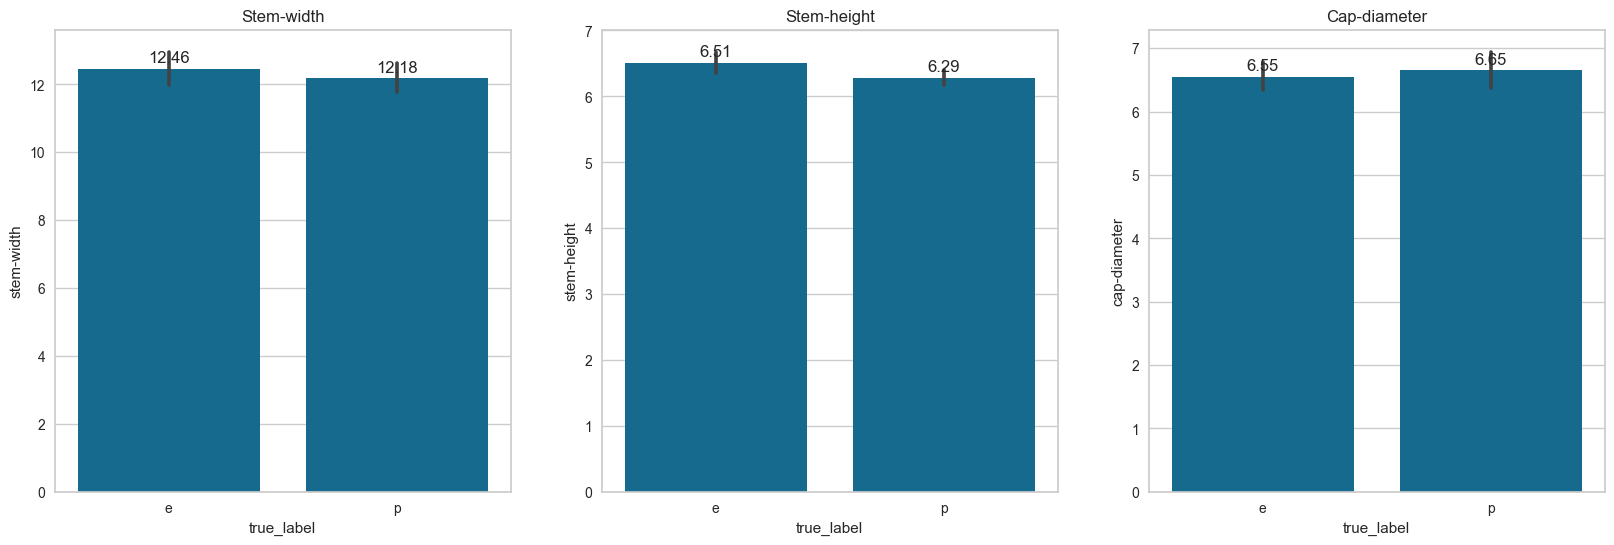

In [20]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=wrong, x='true_label', y='stem-width')
display_number(ax1)
ax1.set_title("Stem-width")

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=wrong, x='true_label', y='stem-height')
ax2.set_title("Stem-height")
display_number(ax2)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=wrong, x='true_label', y='cap-diameter')
ax3.set_title("Cap-diameter")
display_number(ax3)

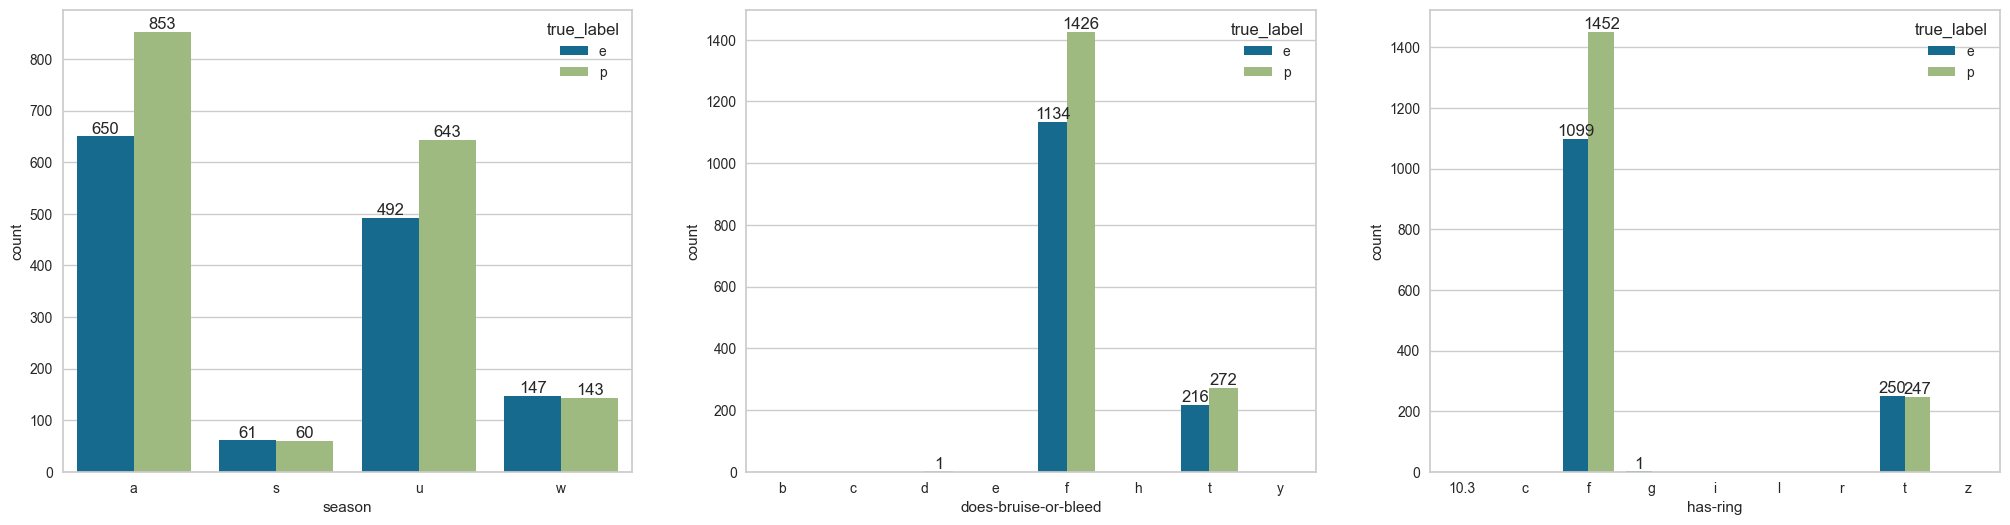

In [21]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
ax4 = sns.countplot(data=wrong, x="season", hue="true_label")
for p in ax4.containers:
    ax4.bar_label(p)

plt.subplot(1, 3, 2)
ax5 = sns.countplot(data=wrong, x="does-bruise-or-bleed", hue='true_label')
for p in ax5.containers:
    ax5.bar_label(p, fmt='%d')

plt.subplot(1, 3, 3)
ax6 = sns.countplot(data=wrong, x="has-ring", hue='true_label')
for p in ax6.containers:
    ax6.bar_label(p, fmt='%d')

In [33]:
wrong

,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface,prediction_label,prediction_score,true_label
194748,6.32,5.08,a,4.650000,f,n,f,n,b,m,p,f,x,t,c,i,p,0.9984,e
664682,7.15,20.84,u,10.620000,f,n,f,w,x,d,n,f,x,s,NaN,NaN,e,0.9928,p
291927,8.07,0.00,a,5.290000,f,w,f,f,o,d,w,f,NaN,s,c,f,e,0.5766,p
1277450,8.37,37.82,s,52.509998,f,y,f,k,o,d,y,f,p,y,NaN,k,e,0.9884,p
2473848,4.83,0.92,u,0.870000,t,n,f,n,x,d,p,f,a,g,NaN,NaN,e,0.9817,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815379,5.98,7.12,a,3.450000,f,n,f,w,x,d,n,f,s,t,c,NaN,e,0.7378,p
1192977,8.87,17.08,a,11.050000,t,w,t,w,f,m,n,l,e,s,NaN,NaN,e,0.9976,p
1163365,6.53,6.64,u,4.060000,f,n,f,w,b,d,n,f,NaN,y,c,NaN,p,0.5314,e
2095732,7.93,16.07,u,6.800000,t,y,f,w,x,d,y,f,x,t,c,NaN,e,0.9940,p


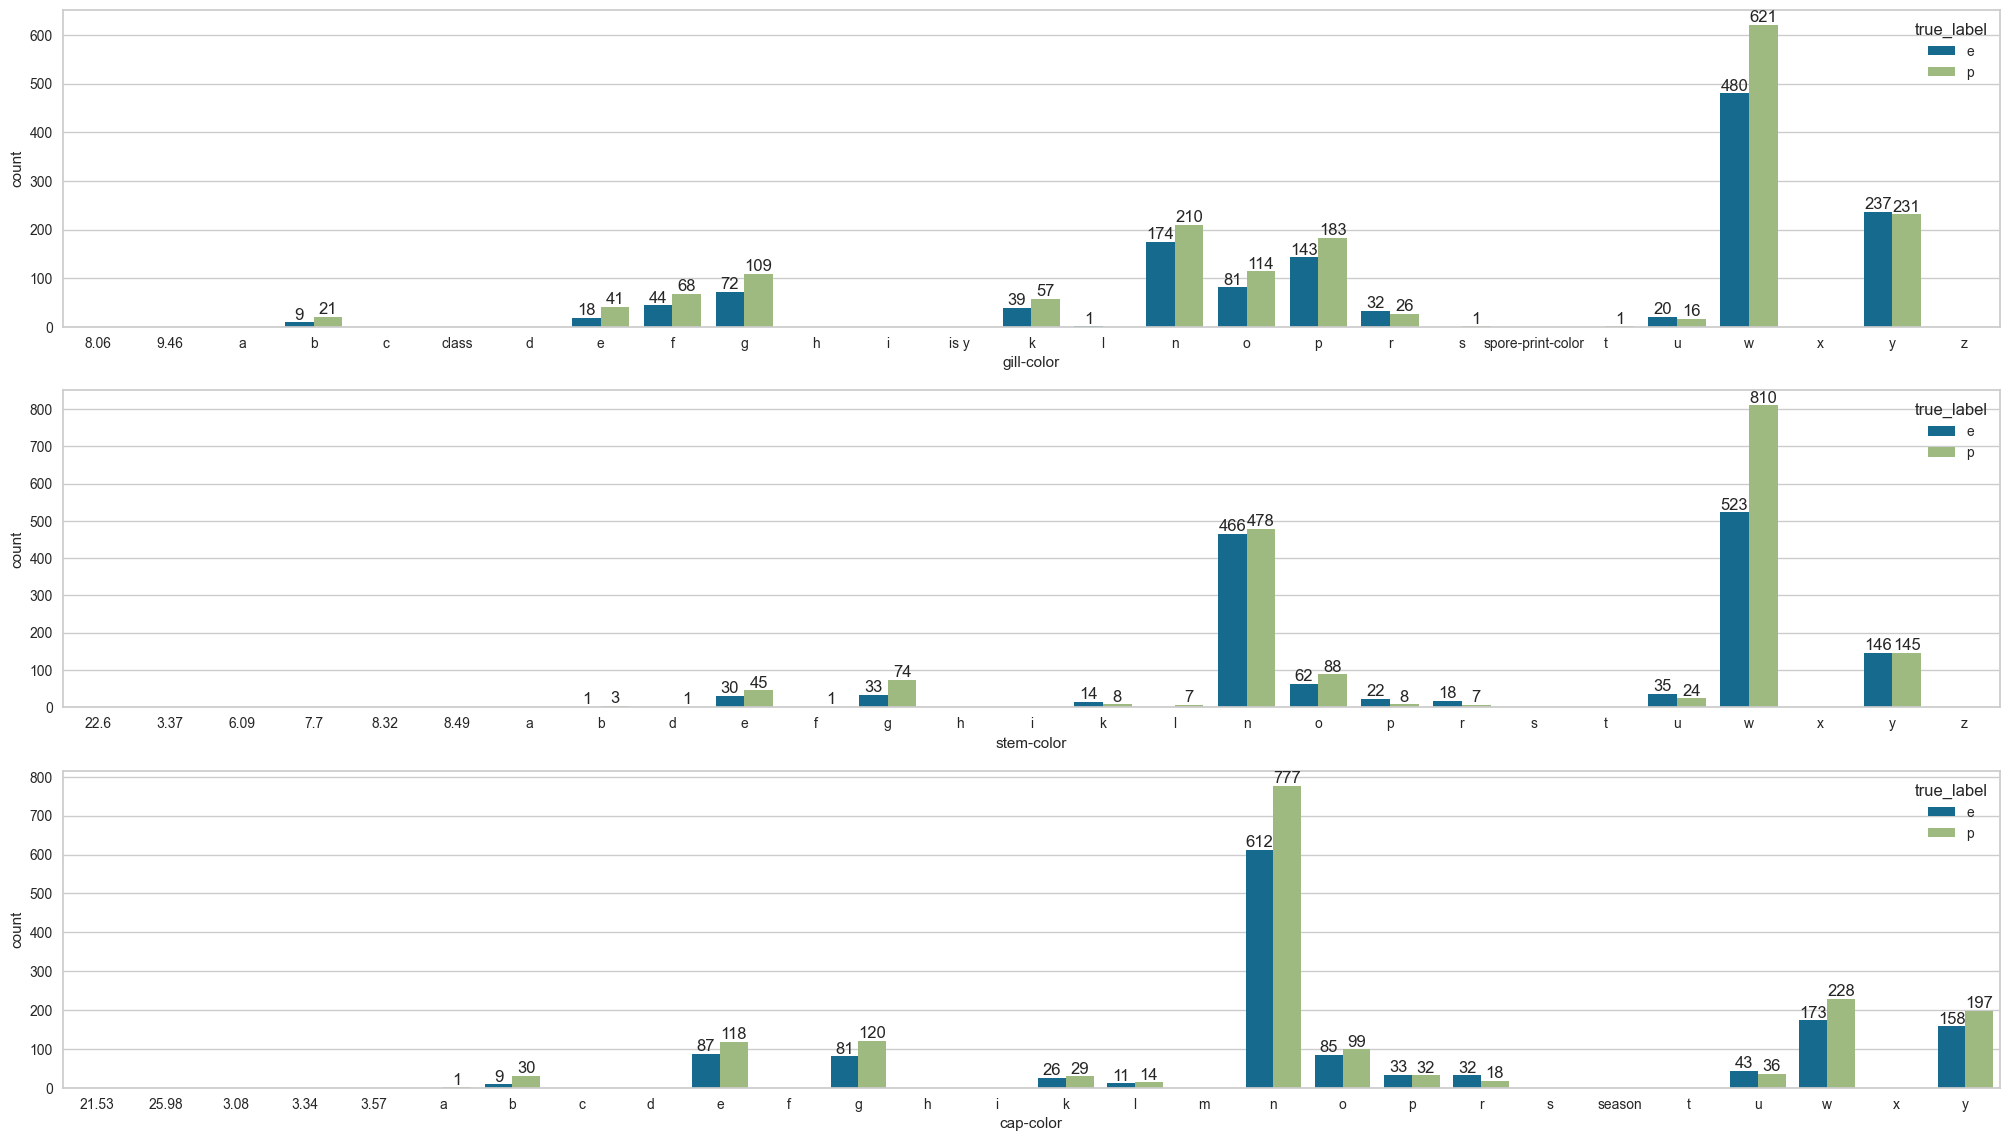

In [37]:
plt.figure(figsize=(25, 14))

plt.subplot(3, 1, 1)
ax7 = sns.countplot(data=wrong, x='gill-color', hue='true_label', dodge=True)
for p in ax7.containers:
    ax7.bar_label(p)

plt.subplot(3, 1, 2)
ax8 = sns.countplot(data=wrong, x='stem-color', hue='true_label')
for p in ax8.containers:
    ax8.bar_label(p)

plt.subplot(3, 1, 3)
ax9 = sns.countplot(data=wrong, x='cap-color', hue='true_label')
for p in ax9.containers:
    ax9.bar_label(p)

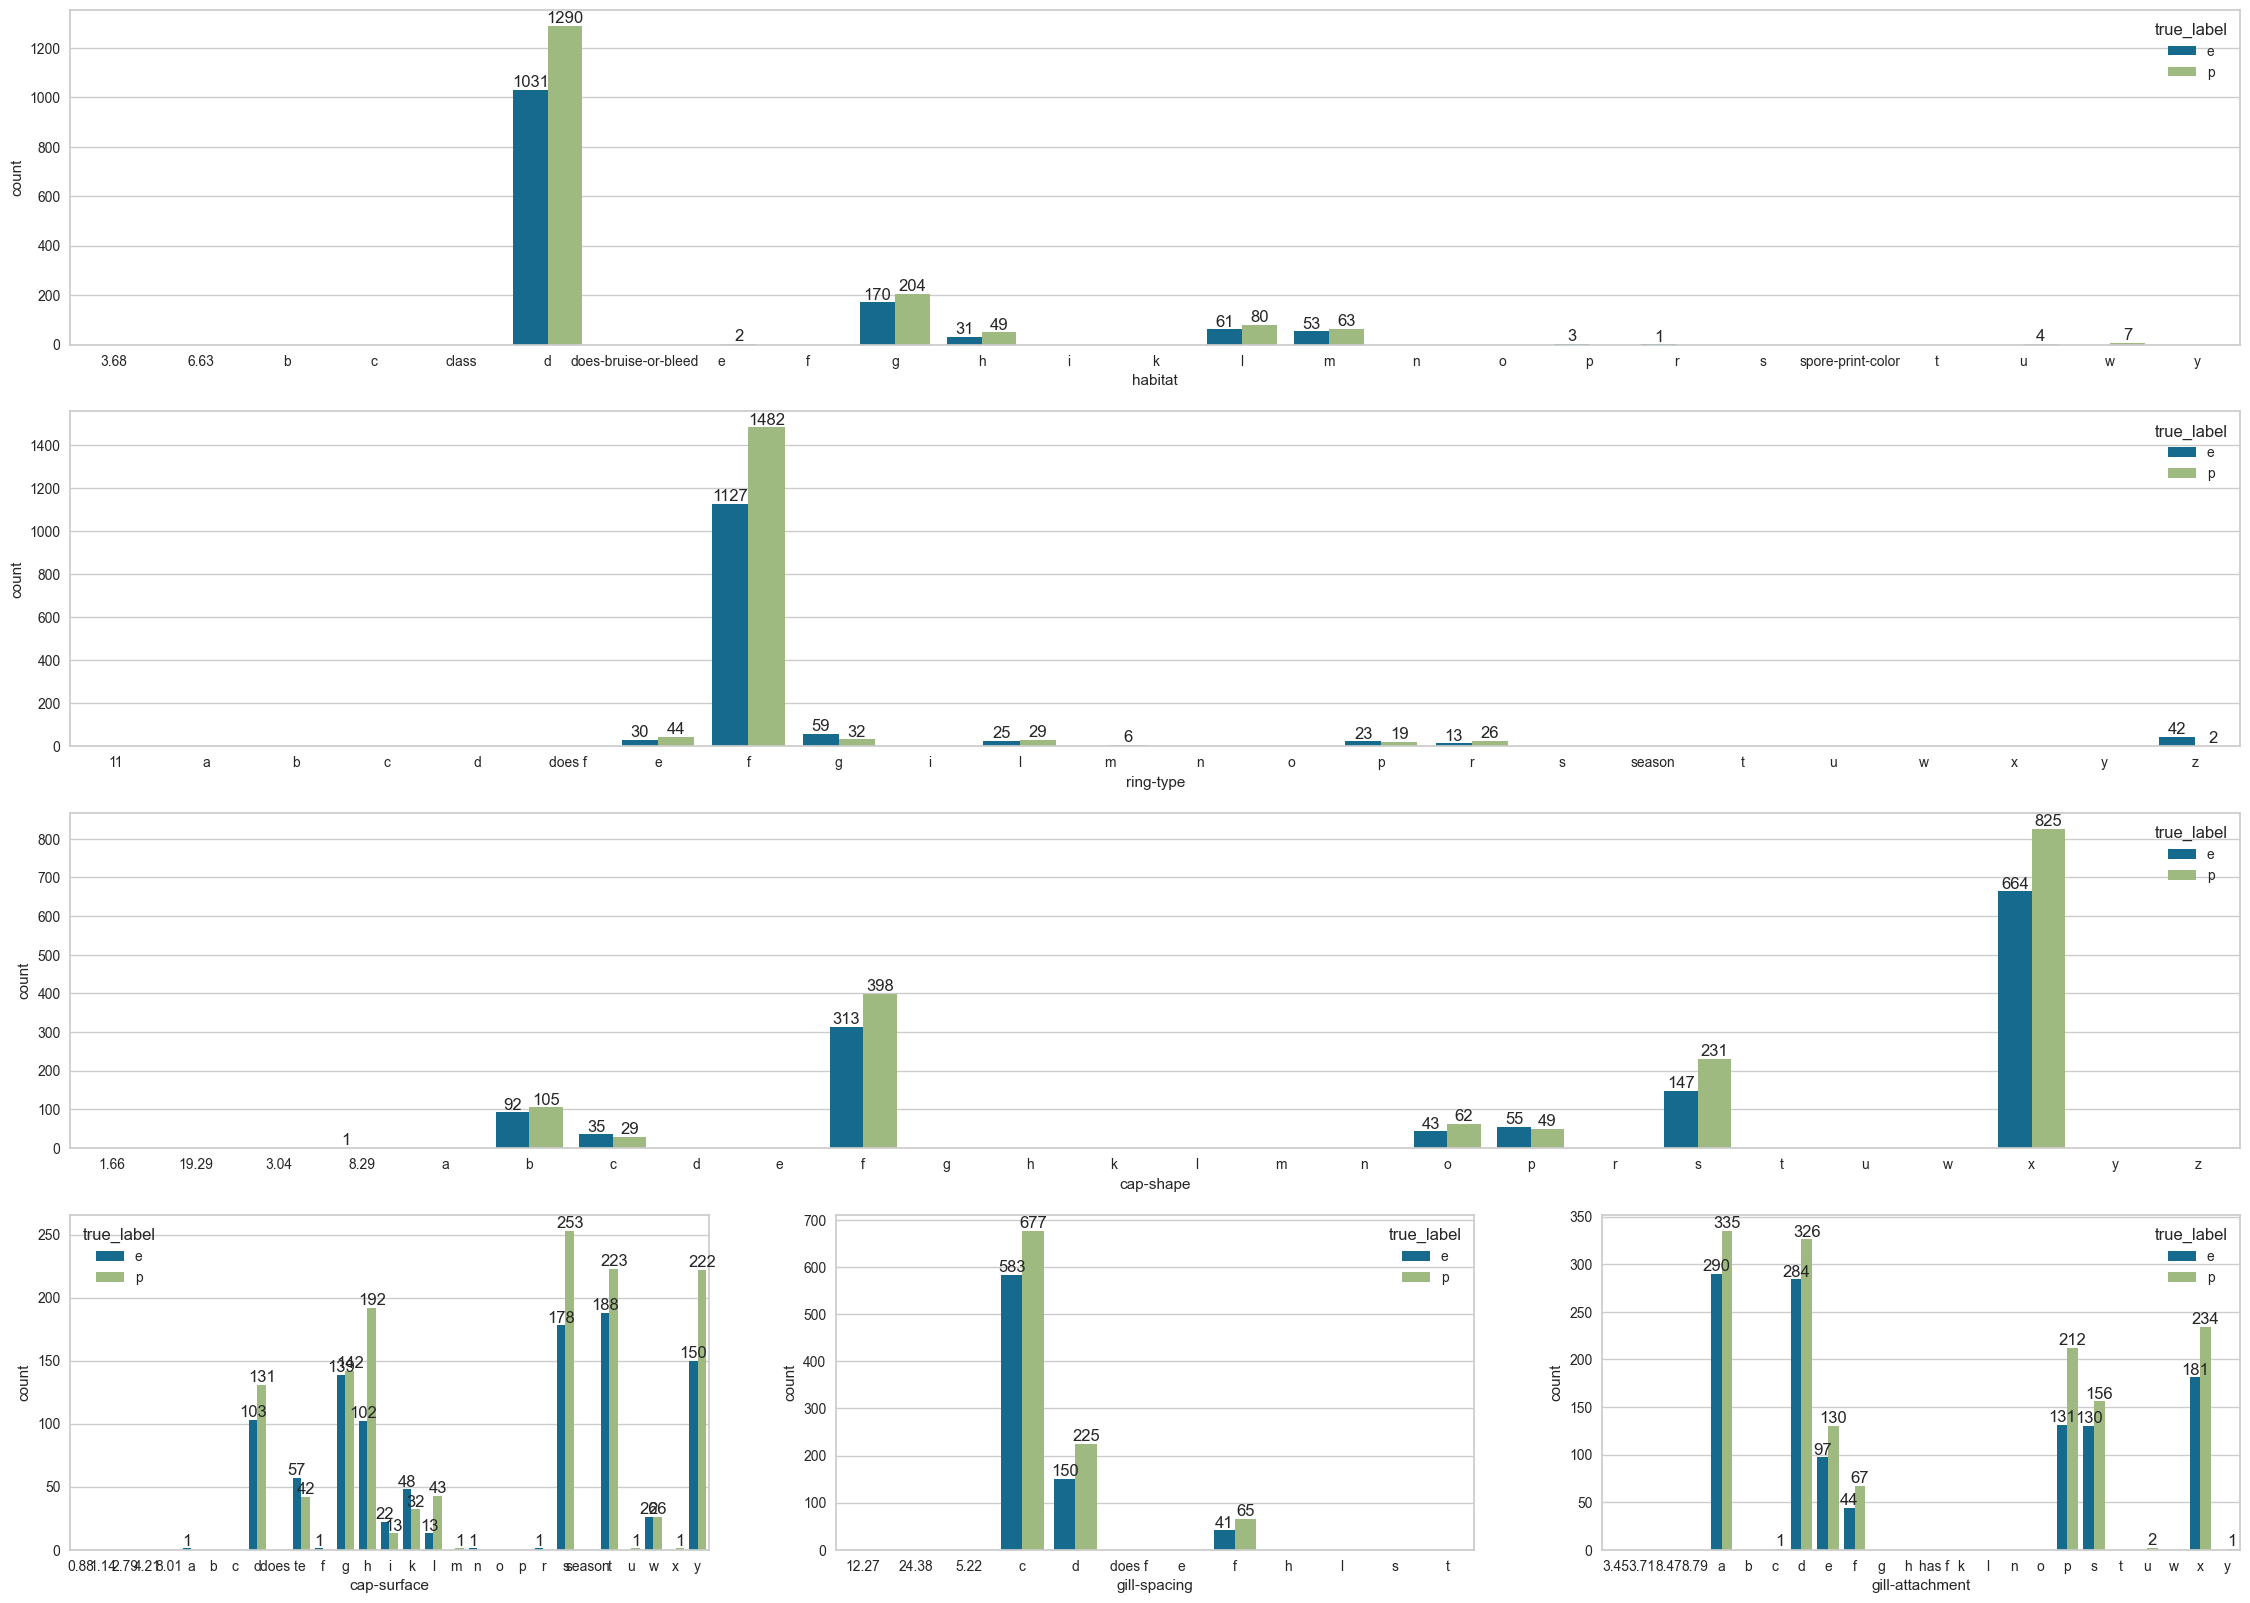

In [38]:
fig = plt.figure(figsize=(28, 20))

ax10 = plt.subplot2grid((4, 3), (0, 0), colspan=4)
sns.countplot(data=wrong, x='habitat', hue='true_label', ax=ax10)
for p in ax10.containers:
    ax10.bar_label(p, fmt="%d")

ax11 = plt.subplot2grid((4, 3), (1, 0), colspan=4)
sns.countplot(data=wrong, x='ring-type', hue='true_label', ax=ax11)
for p in ax11.containers:
    ax11.bar_label(p, fmt="%d")
    
ax12 = plt.subplot2grid((4, 3), (2, 0), colspan=4)
sns.countplot(data=wrong, x='cap-shape', hue='true_label', ax=ax12)
for p in ax12.containers:
    ax12.bar_label(p, fmt="%d")

ax13 = plt.subplot2grid((4, 3), (3, 0))
sns.countplot(data=wrong, x='cap-surface', hue='true_label', ax=ax13, dodge=True)
for p in ax13.containers:
    ax13.bar_label(p, fmt="%d")

ax14 = plt.subplot2grid((4, 3), (3, 1))
sns.countplot(data=wrong, x='gill-spacing', hue='true_label', ax=ax14)
for p in ax14.containers:
    ax14.bar_label(p, fmt="%d")

ax15 = plt.subplot2grid((4, 3), (3, 2))
sns.countplot(data=wrong, x='gill-attachment', hue='true_label', ax=ax15)
for p in ax15.containers:
    ax15.bar_label(p, fmt="%d")

In [24]:
feature_importance = {}
feature_importance = feature_importance.fromkeys(train_data.columns[1:])
for i, key in enumerate(feature_importance.keys()):
    feature_importance[key] = cb_model.feature_importances_[i]

In [25]:
feature_importance = sorted(feature_importance.items(), key=lambda x: -x[1])
feature_importance = dict(feature_importance)

<Axes: >

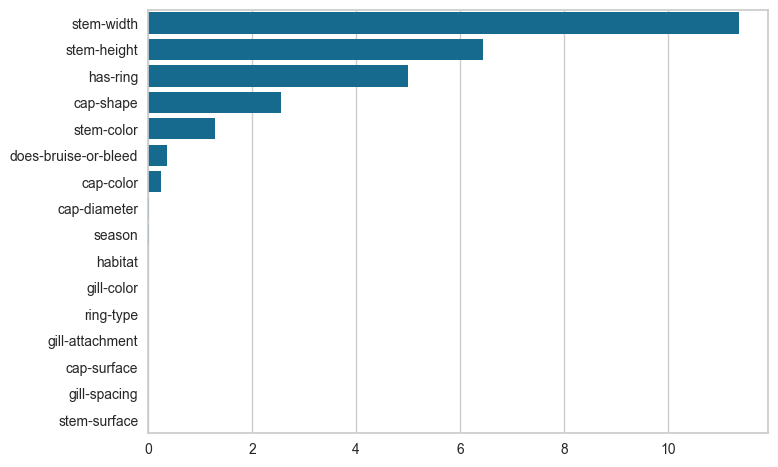

In [26]:
sns.barplot(x=feature_importance.values(), y=feature_importance.keys())

In [39]:
test_pred = predict_model(cb_model, data=test_data)

In [40]:
submission = pd.read_csv(DATA / "sample_submission.csv")

In [41]:
submission["class"] = test_pred["prediction_label"]

In [42]:
submission

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [43]:
submission.to_csv(DATA / "exp1_missing_value_80per_under.csv", index=False)